<Figure size 800x800 with 0 Axes>

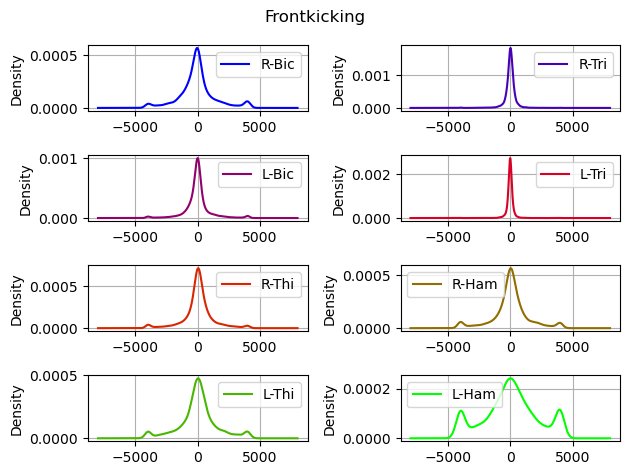

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
dataset = pd.read_csv('C:/Users/saisr/OneDrive/Desktop/random forest model/EMG Physical Action Data Set/sub4/Frontkicking.csv')
dataset.drop(columns = ['Activity'], axis = 1, inplace = True)
plt.figure(figsize=(8,8))
dataset.plot(kind = 'density', subplots = True, 
layout = (4,2), sharex = False, grid = True, legend = True,
title = 'Frontkicking', cmap = 'brg')
plt.tight_layout()
plt.savefig('frontkicking.png')
plt.show()

<Figure size 800x800 with 0 Axes>

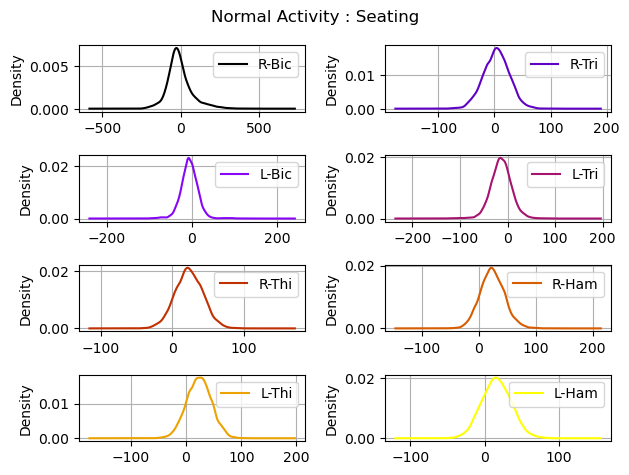

In [3]:
d1 = pd.read_csv('C:/Users/saisr/OneDrive/Desktop/random forest model/EMG Physical Action Data Set/sub4/Seating.csv')
d1.drop(columns = ['Activity'], axis = 1, inplace = True)
plt.figure(figsize=(8,8))
d1.plot(kind = 'density', subplots = True, layout = (4,2), 
sharex = False, grid = True, legend = 'reverse', 
title = 'Normal Activity : Seating', cmap = 'gnuplot')
plt.tight_layout()
plt.savefig('seating.png')
plt.show()

In [1]:
# Classification of Activity based on the EMG Physical Dataset.
# In order to merge all the CSV files into a single dataframe,
# make sure all the CSVs are stored in a sinlge folder and then navigate to that folder

# Importing libraries
import pandas as pd, numpy as np
import os, glob

In [2]:
root_directory = 'C:/Users/saisr/OneDrive/Desktop/random forest model/EMG Physical Action Data Set'

# Use glob to find all CSV files in the subfolders
csv_files = glob.glob(os.path.join(root_directory, '*/*.csv'))

# Concatenate all CSV files into a single DataFrame
dataset = pd.concat(map(pd.read_csv, csv_files))


In [3]:
dataset.size

7177014

In [4]:
dataset = dataset.sample(frac = 1).reset_index(drop = True)
dataset.dropna(axis = 0, inplace = True)

In [5]:
# Dividing into independent feature matrix & dependent variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
# Splitting the dataset into Training & Testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
# Fitting the classifier on training dataset
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 40, random_state = 1)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40, random_state=1)

In [9]:
# Predictions
y_pred = classifier.predict(X_test)

In [10]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [11]:
print(accuracy)

0.9031676894009063


In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion=confusion_matrix(y_test, y_pred)

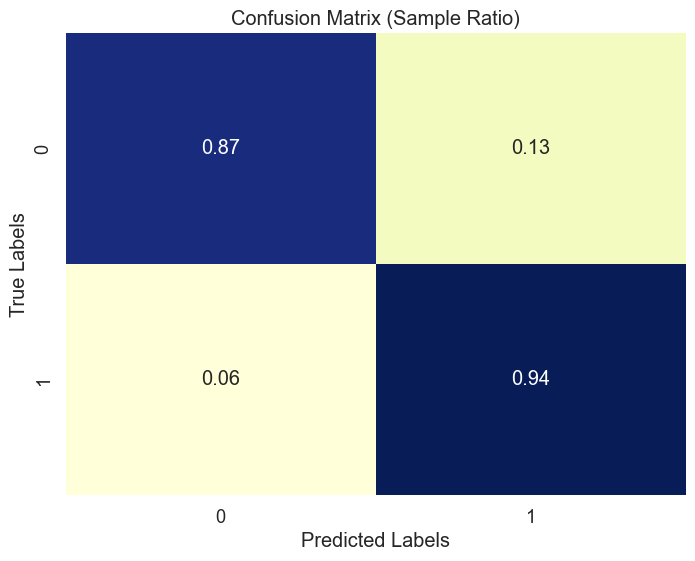

In [14]:
import matplotlib.pyplot as plt
# Step 3: Calculate the ratio of sample_out/total_samples
confusion_ratio = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Step 4: Use Seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size if needed

# Create a heatmap
sns.heatmap(confusion_ratio, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)

# Set axis labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Sample Ratio)")
plt.savefig('cmrandforest.png')
# Show the plot
plt.show()